In [2]:
import pandas as pd
from libs import pairs
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/PPE.csv')
parameter_names = ['gamma0', 'UMV', 'LRP', 'PDDi', 'WeertC']
parameters = df[parameter_names]

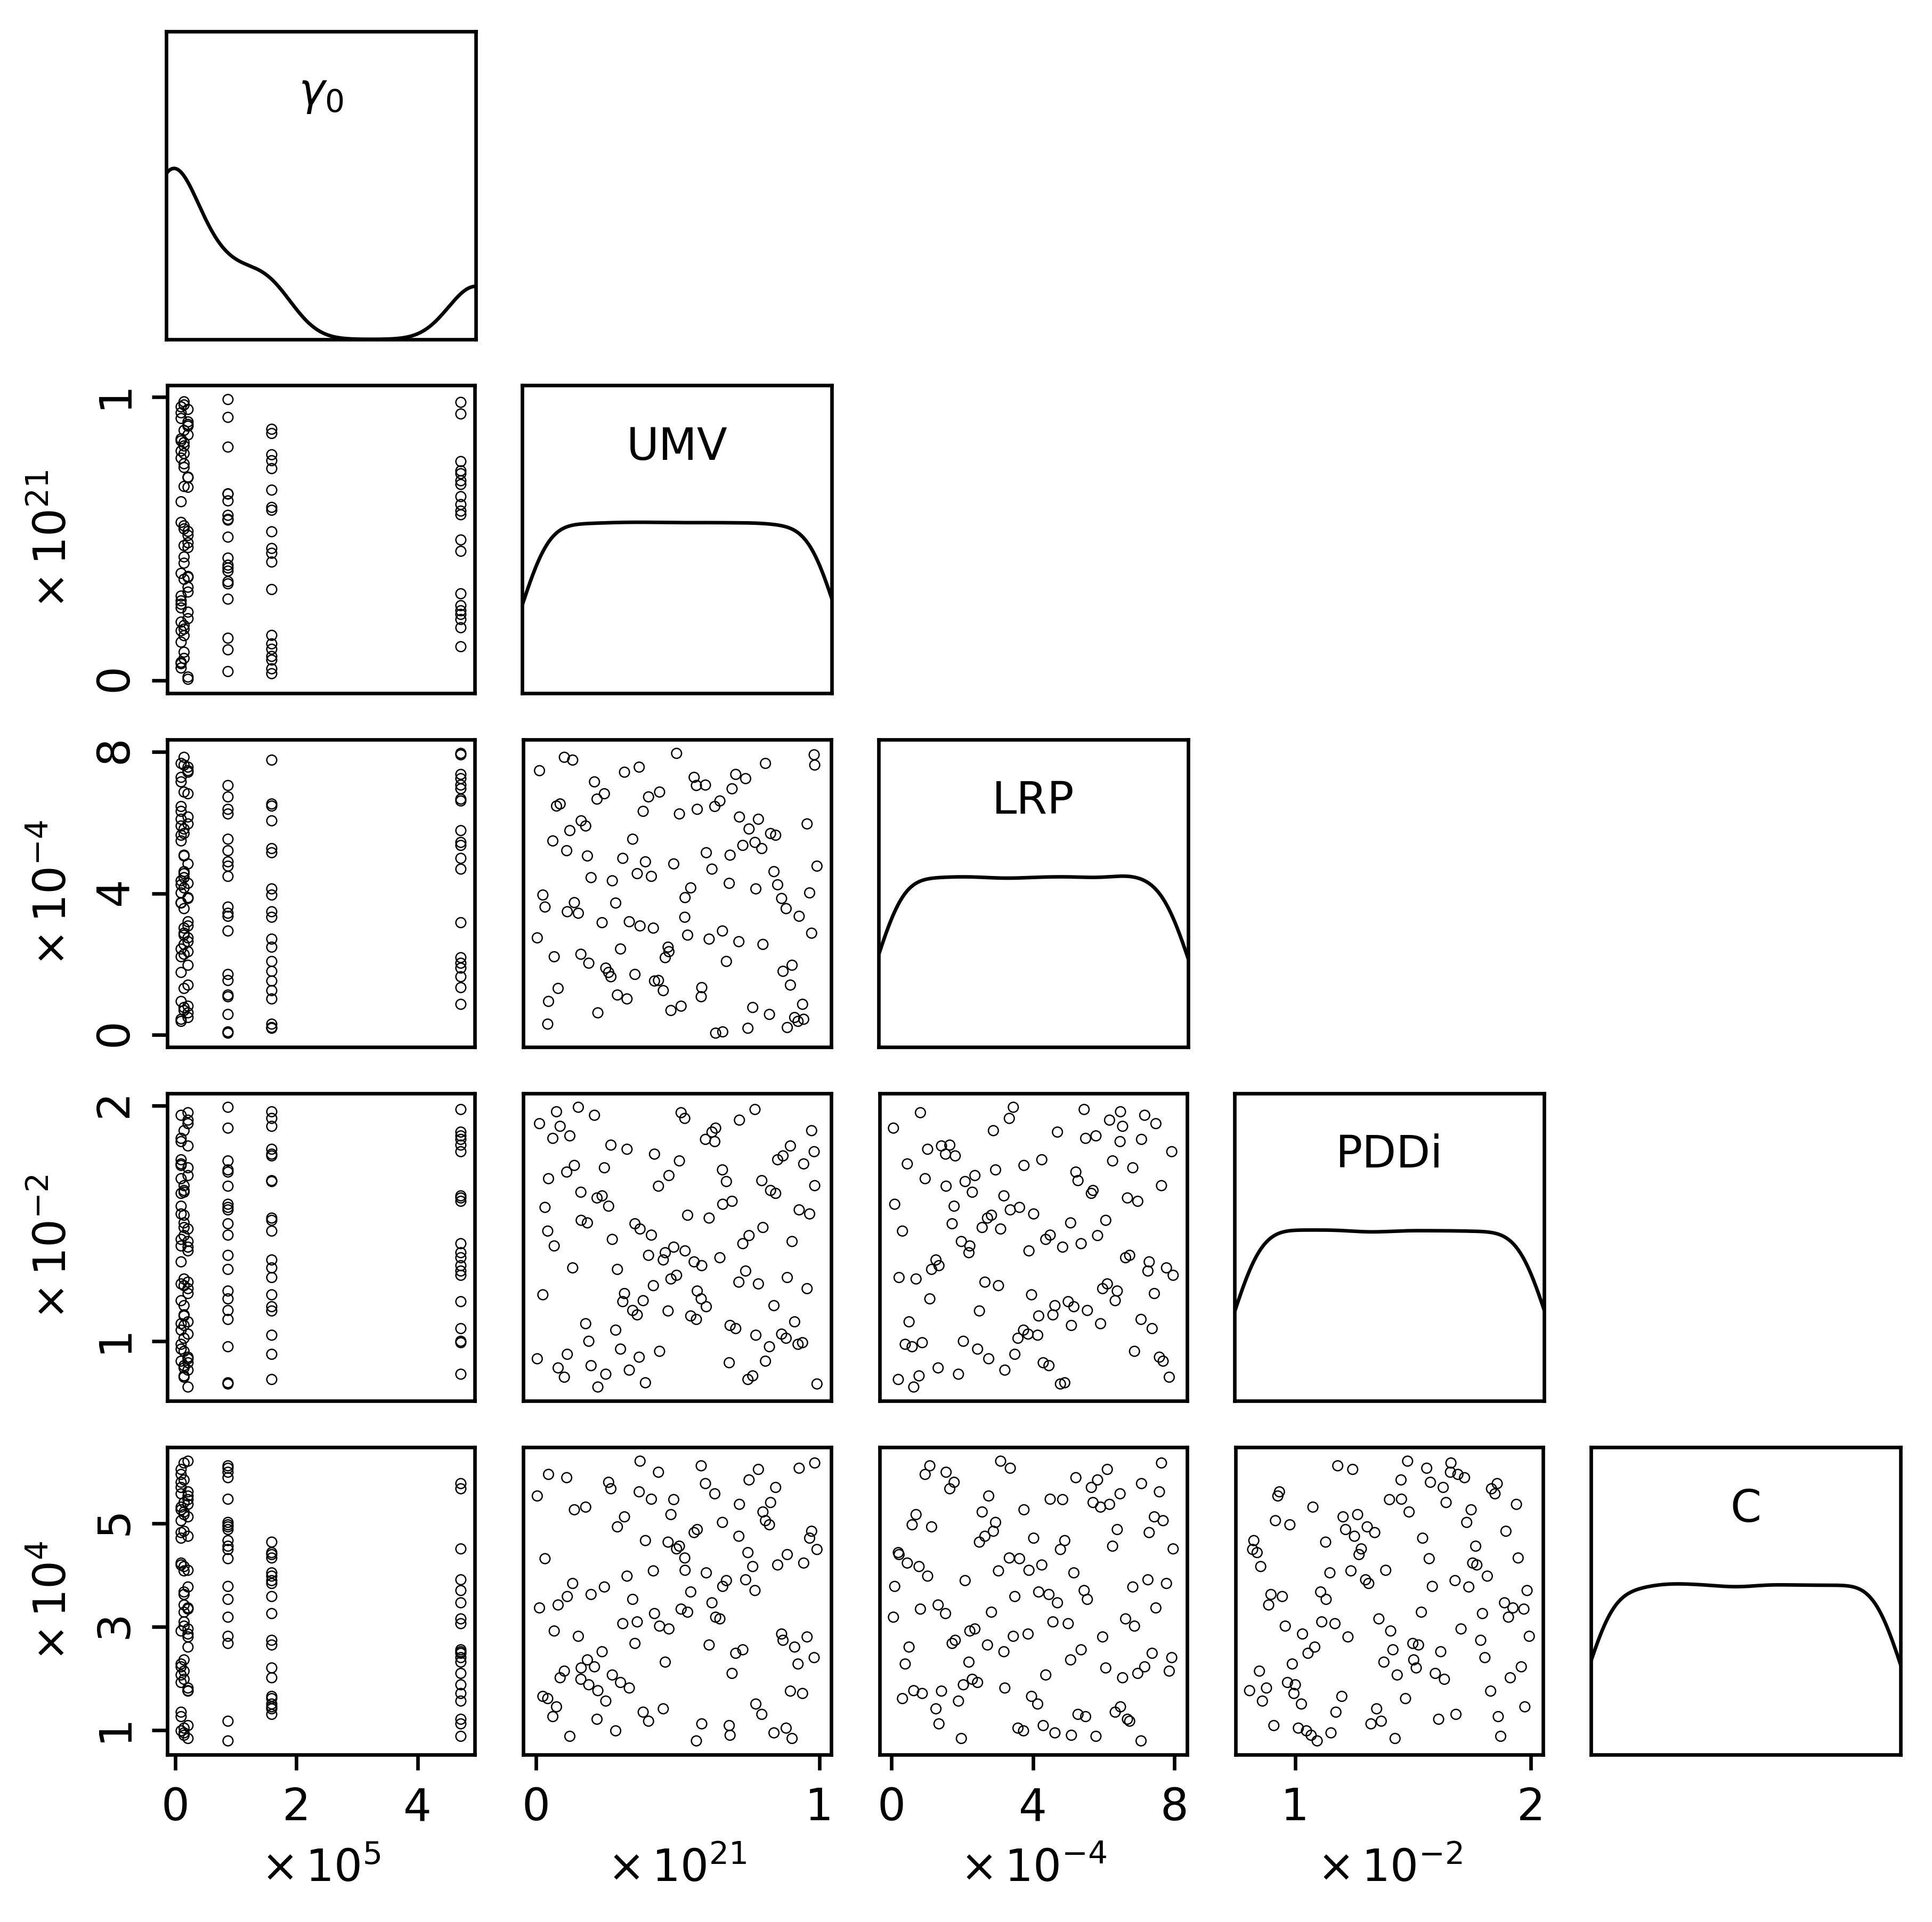

In [4]:
ticks = {
    'gamma0'    : [0, 2e5, 4e5],
    'UMV'       : [0, 1e21],
    'LRP'       : [0, 4e-4, 8e-4],
    'PDDi'      : [1e-2, 2e-2],
    'WeertC'    : [1e4, 3e4, 5e4]
}

labels = ['$\gamma_0$', 'UMV', 'LRP', 'PDDi', 'C']

kw = {
    's'         : 5,
    'lw'        : 0.3,
    'edgecolor' : 'black',
    'facecolor' : 'none'
}

fig = pairs.plot(parameters, ticks=ticks, labels=labels, **kw)
plt.savefig('plots/pdf/pairs.pdf', format='pdf')

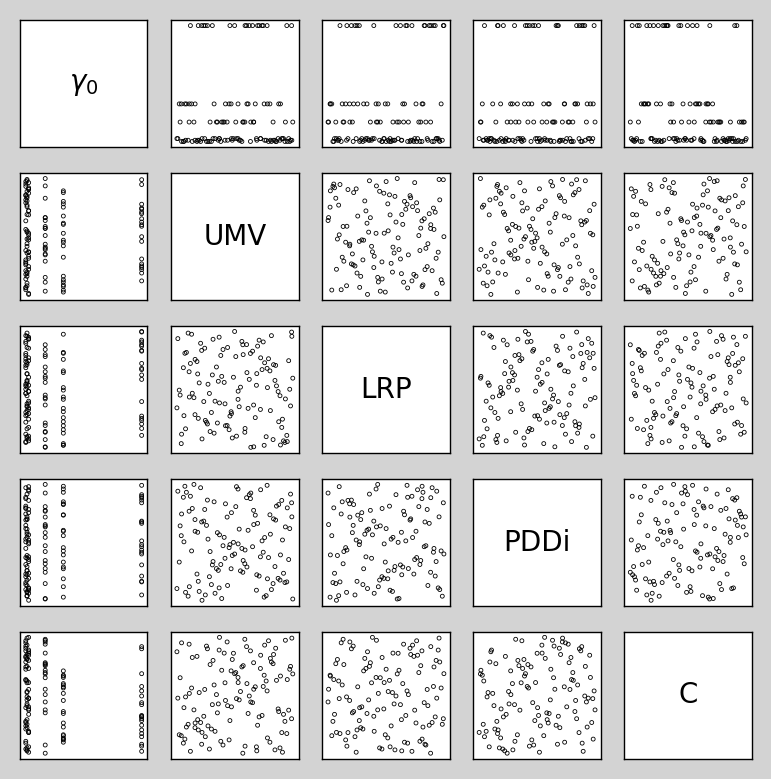

In [45]:
from itertools import product
N=5
cols=parameter_names

fig, axes = plt.subplots(nrows=N, ncols=N, dpi=200)

kw = {
    's'         : 2,
    'lw'        : 0.3,
    'edgecolor' : 'black',
    'facecolor' : 'none'
}

D = {
     'gamma0': '$\gamma_0$',
     'UMV': 'UMV',
     'LRP': 'LRP',
     'PDDi': 'PDDi',
     'WeertC': 'C'
}

for i, j in product(range(N), range(N)):
        ax = axes[i][j]
        x = df[cols[i]]
        y = df[cols[j]]

        x = (x-x.min())/(x.max() - x.min())
        y = (y-y.min())/(y.max() - y.min())

        # upper panel
        #if i<j:
        #    ax.set_axis_off()
        #    continue
        
        # diagonal panel
        if i==j:
            label = D[cols[i]]
            ax.set_aspect('equal')
            ax.text(0.5, 0.5, label, transform=ax.transAxes, ha='center', va='center')
            continue

        # lower panel
        ax.scatter(y, x, **kw)

for ax in axes.flatten():
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    for spine in ['top','bottom','left','right']:
        ax.spines[spine].set_linewidth(0.5)

fig.subplots_adjust(wspace=-0.61, hspace=0.2)
fig.patch.set_facecolor('lightgrey')
